# Problem Description
Catapult Inc. is one of the leading pharma companies in the world. Their biggest clinical success over the last decade is due to docstar1000 which is an experimental spray aimed at quick healing of achilees heel. It was released in Austria, Canada, Germany, France, India, japan, USA and UK. A key ingredient to the production of this drug is the chemical "cycloxyflovin". The sprays are produced in the individual markets however, the chemical cycloxyflovin is manufactured in the company headquarters in Phoenix, USA and sourced to individual markets. The chemical cycloxyflovin is sourced to three different manufacturing centers in each of these countries periodically and each spray contains 1 unit (5mg) of cycloxyflovin

Catapult. Inc is planning the production process for the chemical cycloxyflovin for the upcoming cycle. Catapult.Inc has given us regionl demand estimates and global Sales for the past period. Now, given these demand estimates and global sales of the past period, we need to build a demand prediction model for the global sales of docstar1000.

Additionally, Due to trade marketing regulation changes that took place over the last few years in the regions of Austria, Canada, Germany, France, India, japan and USA, the HQ at phoenix estimates that the demands of the spray docstar1000 were higher than what is reported in the dataset. For this purpose, they have given us a dataset that contains scaling factor that must be applied to the demand of the countries' respective production centres 

# Data

You are given 2 datasets, one with estimated demand at the 3 production centres in each country and the total predicted demand. The second dataset contains the scaling factor per each country.

### Data Set 1
The data consists of 25 columns. The 8 countries and demand estimates of each of the processing centres in these countries and a seasonal scaling factor (Pharmacies in these regions tend to have periodic buying cycles. Additionally, achilees heel injury being predominantly sport induced, the pharmacies expect a surge in demand in certain times of the year more than the other)

    
### Data Set 2

Scaling factor to be applied to the countries
    
# Technical Environment
* Python
* numpy
* pandas
* scikit-learn
* matplotlib / searborn / altair / plotly

# Approach
The solution is assessed on the following skills:
* A thorough evaluation of the data set using statistical measures and visualization
* Elegant Python coding skills
* Machine Learning modelling fundamentals
* Machine Learning Training
* Model Evaluation

### Importing Libariries

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,MinMaxScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.stattools import adfuller
from sklearn.compose import ColumnTransformer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,HistGradientBoostingRegressor,VotingRegressor
from sklearn.neural_network import  MLPRegressor

In [2]:
import altair as alt

### Exploratory Data Analysis

In [3]:
#reading main file
final_data = pd.read_excel('/Users/ulvijafarli/Desktop/Kaggle Competiiton/Simon-Kucher _ Invitation to our Coding Test /final_data.xlsx', usecols = 'B:AA')

In [4]:
final_data.head()

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,...,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
0,1,3,3,4,4,4,0,7,11,6,...,17,18,20,21,20,22,22,24,factor1,408
1,1,1,3,4,6,7,4,6,12,10,...,17,15,18,20,21,23,24,24,factor1,395
2,1,0,3,4,5,5,10,7,10,21,...,17,14,19,21,21,24,22,24,factor1,368
3,1,1,3,4,5,6,3,8,11,10,...,17,18,19,19,21,21,22,24,factor1,364
4,1,5,3,4,4,5,1,8,8,8,...,17,19,19,20,20,22,23,24,factor1,355


In [5]:
#getting information about the file 
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AUS_1   50000 non-null  int64 
 1   AUS_2   50000 non-null  int64 
 2   AUS_3   50000 non-null  int64 
 3   CAN_1   50000 non-null  int64 
 4   CAN_2   50000 non-null  int64 
 5   CAN_3   50000 non-null  int64 
 6   GER_1   50000 non-null  int64 
 7   GER_2   50000 non-null  int64 
 8   GER_3   50000 non-null  int64 
 9   FRA_1   50000 non-null  int64 
 10  FRA_2   50000 non-null  int64 
 11  FRA_3   50000 non-null  int64 
 12  IND_1   50000 non-null  int64 
 13  IND_2   50000 non-null  int64 
 14  IND_3   50000 non-null  int64 
 15  JAP_1   50000 non-null  int64 
 16  JAP_2   50000 non-null  int64 
 17  JAP_3   50000 non-null  int64 
 18  USA_1   50000 non-null  int64 
 19  USA_2   50000 non-null  int64 
 20  USA_3   50000 non-null  int64 
 21  UK_1    50000 non-null  int64 
 22  UK_2    50000 non-null

As can been seen above, there are total 50000 entries and all columns has non-null values except 'factor' column. There are 520 missing values in the factor column

In [6]:
final_data.isnull().sum()

AUS_1       0
AUS_2       0
AUS_3       0
CAN_1       0
CAN_2       0
CAN_3       0
GER_1       0
GER_2       0
GER_3       0
FRA_1       0
FRA_2       0
FRA_3       0
IND_1       0
IND_2       0
IND_3       0
JAP_1       0
JAP_2       0
JAP_3       0
USA_1       0
USA_2       0
USA_3       0
UK_1        0
UK_2        0
UK_3        0
factor    520
Sales       0
dtype: int64

Lets drop the missing values from that column as it wont have major impact on the final model due to small size

In [7]:
final_data.dropna(inplace=True)

In [8]:
final_data.isnull().sum()

AUS_1     0
AUS_2     0
AUS_3     0
CAN_1     0
CAN_2     0
CAN_3     0
GER_1     0
GER_2     0
GER_3     0
FRA_1     0
FRA_2     0
FRA_3     0
IND_1     0
IND_2     0
IND_3     0
JAP_1     0
JAP_2     0
JAP_3     0
USA_1     0
USA_2     0
USA_3     0
UK_1      0
UK_2      0
UK_3      0
factor    0
Sales     0
dtype: int64

Lets also convert 'factor' column data type into categorical column as it will be needed as input variable for selected model 

In [9]:
final_data['factor'] = final_data['factor'].astype('category')

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49480 entries, 0 to 49479
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   AUS_1   49480 non-null  int64   
 1   AUS_2   49480 non-null  int64   
 2   AUS_3   49480 non-null  int64   
 3   CAN_1   49480 non-null  int64   
 4   CAN_2   49480 non-null  int64   
 5   CAN_3   49480 non-null  int64   
 6   GER_1   49480 non-null  int64   
 7   GER_2   49480 non-null  int64   
 8   GER_3   49480 non-null  int64   
 9   FRA_1   49480 non-null  int64   
 10  FRA_2   49480 non-null  int64   
 11  FRA_3   49480 non-null  int64   
 12  IND_1   49480 non-null  int64   
 13  IND_2   49480 non-null  int64   
 14  IND_3   49480 non-null  int64   
 15  JAP_1   49480 non-null  int64   
 16  JAP_2   49480 non-null  int64   
 17  JAP_3   49480 non-null  int64   
 18  USA_1   49480 non-null  int64   
 19  USA_2   49480 non-null  int64   
 20  USA_3   49480 non-null  int64   
 21  UK_1    4948

In [11]:
final_data.shape

(49480, 26)

In [12]:
#Reading second file 
scaling_df = pd.read_excel('/Users/ulvijafarli/Desktop/Kaggle Competiiton/Simon-Kucher _ Invitation to our Coding Test /scaling_df.xlsx', usecols = 'B:C')

In [13]:
scaling_df

,Country,Scaling Factor
0,Australia,3.50
1,Canada,2.50
2,Germany,2.25
3,France,1.85
4,India,1.20
5,Japan,1.55
6,United States of America,1.50


In [14]:
scaling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7 non-null      object 
 1   Scaling Factor  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


No furher preprocessing needed for scaling_df table



The final_data will be modified below to make it more fit for further data analysis/modelling by calculating actual demand estimates based on scaling factor in each country given in second table scaling_df, by aggregating production centers demand estimates under their respective countries and by calculting total demand estimates across the regions

In [15]:
#copying table to new table to keep original one untouched
final_data_clean = final_data.copy()

In [16]:
#calculating actual demand estimates based on scaling factor in each region
country_codes = {'AUS': 'Australia', 'CAN': 'Canada', 'GER': 'Germany', 'FRA': 'France', 'IND': 'India', 'JAP': 'Japan', 'USA': 'United States of America'}

for col in final_data_clean.filter(regex='|'.join(country_codes.keys()), axis=1):
    code = next(code for code in country_codes if code in col)
    country = country_codes[code]
    scaling_factor = scaling_df.loc[scaling_df['Country'] == country, 'Scaling Factor'].values[0]
    final_data_clean[col] *= scaling_factor
    
final_data_clean

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,...,JAP_2,JAP_3,USA_1,USA_2,USA_3,UK_1,UK_2,UK_3,factor,Sales
0,3.5,10.5,10.5,10.0,10.0,10.0,0.00,15.75,24.75,11.10,...,26.35,27.90,30.0,31.5,30.0,22,22,24,factor1,408
1,3.5,3.5,10.5,10.0,15.0,17.5,9.00,13.50,27.00,18.50,...,26.35,23.25,27.0,30.0,31.5,23,24,24,factor1,395
2,3.5,0.0,10.5,10.0,12.5,12.5,22.50,15.75,22.50,38.85,...,26.35,21.70,28.5,31.5,31.5,24,22,24,factor1,368
3,3.5,3.5,10.5,10.0,12.5,15.0,6.75,18.00,24.75,18.50,...,26.35,27.90,28.5,28.5,31.5,21,22,24,factor1,364
4,3.5,17.5,10.5,10.0,10.0,12.5,2.25,18.00,18.00,14.80,...,26.35,29.45,28.5,30.0,30.0,22,23,24,factor1,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49475,3.5,10.5,10.5,10.0,17.5,15.0,2.25,20.25,22.50,5.55,...,26.35,29.45,27.0,31.5,31.5,22,22,24,factor4,531
49476,3.5,7.0,10.5,10.0,10.0,15.0,9.00,15.75,15.75,14.80,...,26.35,31.00,25.5,33.0,30.0,21,23,24,factor4,514
49477,3.5,0.0,10.5,10.0,15.0,12.5,0.00,11.25,18.00,35.15,...,26.35,31.00,28.5,28.5,31.5,22,22,24,factor4,519
49478,3.5,3.5,10.5,10.0,17.5,12.5,0.00,11.25,22.50,7.40,...,26.35,29.45,28.5,31.5,31.5,24,23,24,factor4,532


In [17]:
#summing up total demand estimates for each country
countries = ['Australia', 'Canada', 'Germany', 'France', 'India', 'Japan', 'USA', 'UK']
for country in countries:
    columns = [f"{country.upper()[:3]}_{i}" for i in range(1, 4)]

    final_data_clean[country] = final_data_clean[columns].sum(axis=1)

In [18]:
#dropping production center columns in each country   
#final_data_clean.drop(['AUS_1', 'AUS_2', 'AUS_3', 'CAN_1', 'CAN_2', 'CAN_3', 'GER_1', 'GER_2',
      # 'GER_3', 'FRA_1', 'FRA_2', 'FRA_3', 'IND_1', 'IND_2', 'IND_3', 'JAP_1',
      # 'JAP_2', 'JAP_3', 'USA_1', 'USA_2', 'USA_3', 'UK_1', 'UK_2', 'UK_3'], axis =1, inplace=True)

In [19]:
final_data_clean.columns

Index(['AUS_1', 'AUS_2', 'AUS_3', 'CAN_1', 'CAN_2', 'CAN_3', 'GER_1', 'GER_2',
       'GER_3', 'FRA_1', 'FRA_2', 'FRA_3', 'IND_1', 'IND_2', 'IND_3', 'JAP_1',
       'JAP_2', 'JAP_3', 'USA_1', 'USA_2', 'USA_3', 'UK_1', 'UK_2', 'UK_3',
       'factor', 'Sales', 'Australia', 'Canada', 'Germany', 'France', 'India',
       'Japan', 'USA', 'UK'],
      dtype='object')

In [20]:
#calculating total estimated demand across region for each row 
final_data_clean['Total_Scaled_demand']=final_data_clean.iloc[:,26:].sum(axis=1)

In [21]:
#decriptive statistics
final_data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
AUS_1,49480.0,3.489743,1.059561e+00,0.00,3.50,3.50,3.50,7.00
AUS_2,49480.0,6.970928,7.238111e+00,0.00,3.50,3.50,10.50,84.00
AUS_3,49480.0,10.500000,0.000000e+00,10.50,10.50,10.50,10.50,10.50
CAN_1,49480.0,10.000000,5.505987e-02,7.50,10.00,10.00,10.00,12.50
CAN_2,49480.0,12.483680,4.534854e+00,-7.50,10.00,12.50,15.00,30.00
CAN_3,49480.0,14.998585,2.151742e+00,7.50,12.50,15.00,17.50,25.00
GER_1,49480.0,15.842901,1.583875e+01,0.00,4.50,11.25,22.50,186.75
GER_2,49480.0,17.978946,4.000647e+00,0.00,15.75,18.00,20.25,33.75
GER_3,49480.0,20.246771,2.556769e+00,9.00,18.00,20.25,22.50,29.25
FRA_1,49480.0,18.432812,1.835889e+01,0.00,5.55,12.95,25.90,223.85


The summary statistics above shows that for some countries some demand estimates (i.e max values) had been higher that compared to other countries which requires scalling all demand estimates before applying any machine learning model. 

Since there is no time period given for the 'final_data' dataset, hourly timestamp will be generated to make the data set timeseries

In [22]:
#creating timestamp index for the dataset
time = pd.date_range('2017', periods=len(final_data_clean),freq='H')
final_data_clean.set_index(time,inplace=True)
final_data_clean.index.set_names('time',inplace=True)

final_data_clean.head()

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,...,Sales,Australia,Canada,Germany,France,India,Japan,USA,UK,Total_Scaled_demand
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,3.5,10.5,10.5,10.0,10.0,10.0,0.00,15.75,24.75,11.10,...,408,24.5,30.0,40.50,70.30,33.6,82.15,91.5,68,440.55
2017-01-01 01:00:00,3.5,3.5,10.5,10.0,15.0,17.5,9.00,13.50,27.00,18.50,...,395,17.5,42.5,49.50,59.20,39.6,75.95,88.5,71,443.75
2017-01-01 02:00:00,3.5,0.0,10.5,10.0,12.5,12.5,22.50,15.75,22.50,38.85,...,368,14.0,35.0,60.75,62.90,42.0,72.85,91.5,70,449.00
2017-01-01 03:00:00,3.5,3.5,10.5,10.0,12.5,15.0,6.75,18.00,24.75,18.50,...,364,17.5,37.5,49.50,46.25,37.2,79.05,88.5,67,422.50
2017-01-01 04:00:00,3.5,17.5,10.5,10.0,10.0,12.5,2.25,18.00,18.00,14.80,...,355,31.5,32.5,38.25,44.40,38.4,74.40,88.5,69,416.95


## Data Visualization

From below plots, we can see that Japan, USA, Germany, France had more demand for docstar1000 sprays compoared to other countries throughout the period 

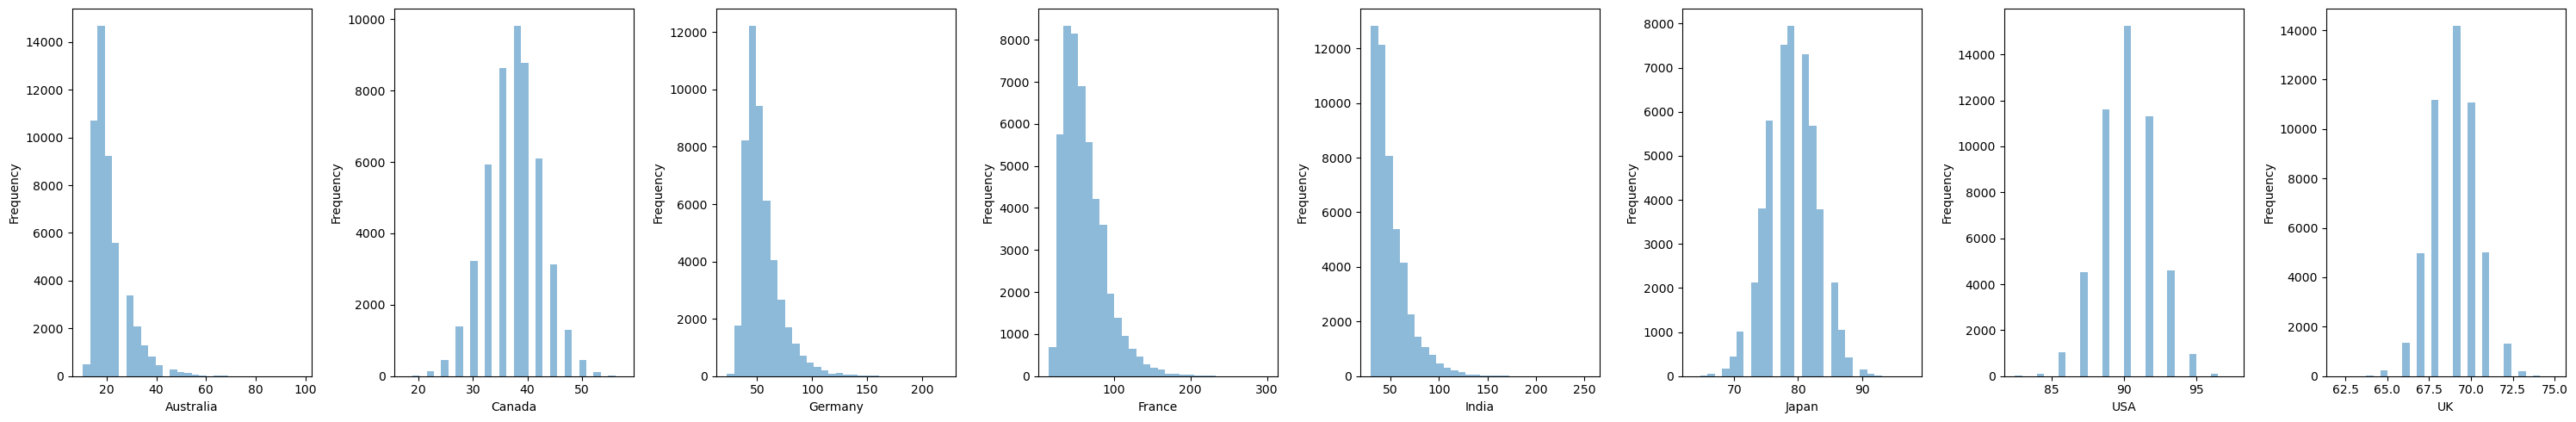

In [23]:
fig, axis = plt.subplots(1, 8)
fig.set_figheight(5)
fig.set_figwidth(30)
axes = axis.flatten()
for ax, col in zip(axes, final_data_clean[['Australia', 'Canada', 'Germany', 'France', 'India', 'Japan', 'USA', 'UK']].columns):
    ax.hist(final_data_clean[col], bins=30, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

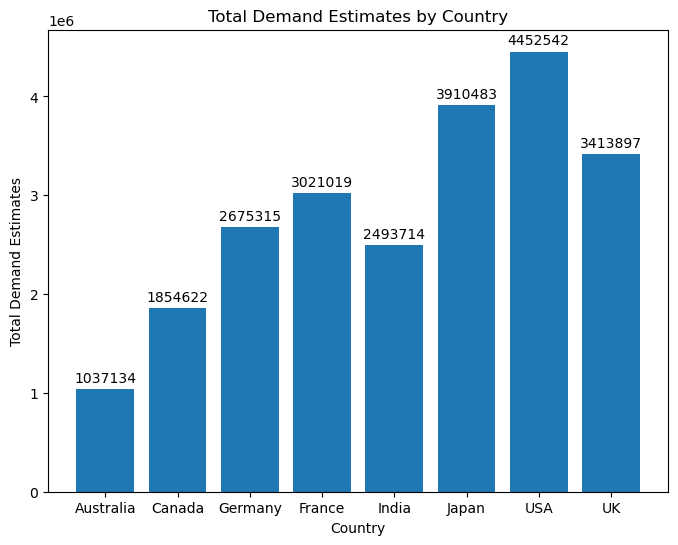

In [24]:
sum_data = final_data_clean[['Australia', 'Canada', 'Germany', 'France', 'India', 'Japan', 'USA', 'UK']].sum(axis=0)

fig, ax = plt.subplots(figsize=(8, 6))

rects = ax.bar(sum_data.index, sum_data.values)
ax.set_xlabel('Country')
ax.set_ylabel('Total Demand Estimates')
ax.set_title('Total Demand Estimates by Country')

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

Lets see how sales and demand estimates changed over time 

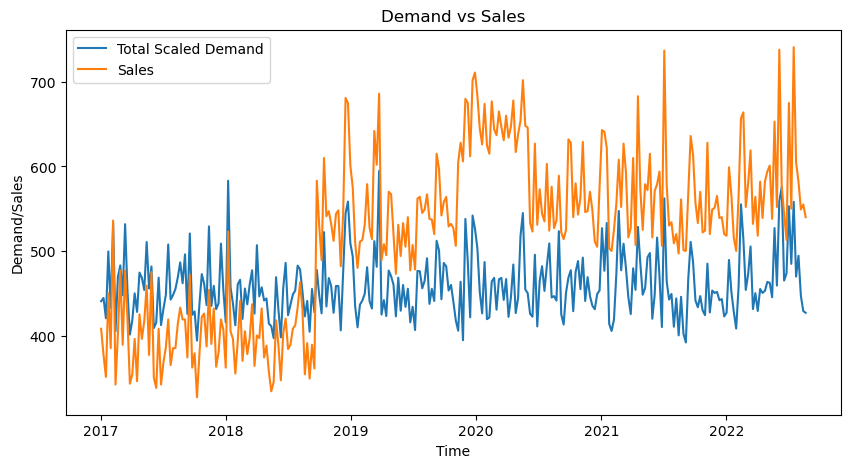

In [25]:
plt.figure(figsize=(10,5))
plt.plot(final_data_clean['Total_Scaled_demand'][::24*7], label='Total Scaled Demand')
plt.plot(final_data_clean['Sales'][::24*7], label='Sales')
plt.xlabel('Time')
plt.ylabel('Demand/Sales')
plt.title('Demand vs Sales')
plt.legend()
plt.show()

From above plot, we can see that globale demand estimates and sales of sprays had been in increasing trend throughout given period. 

Lets see below how seasonal factors due to trading regulations had effected demand estimates in each country

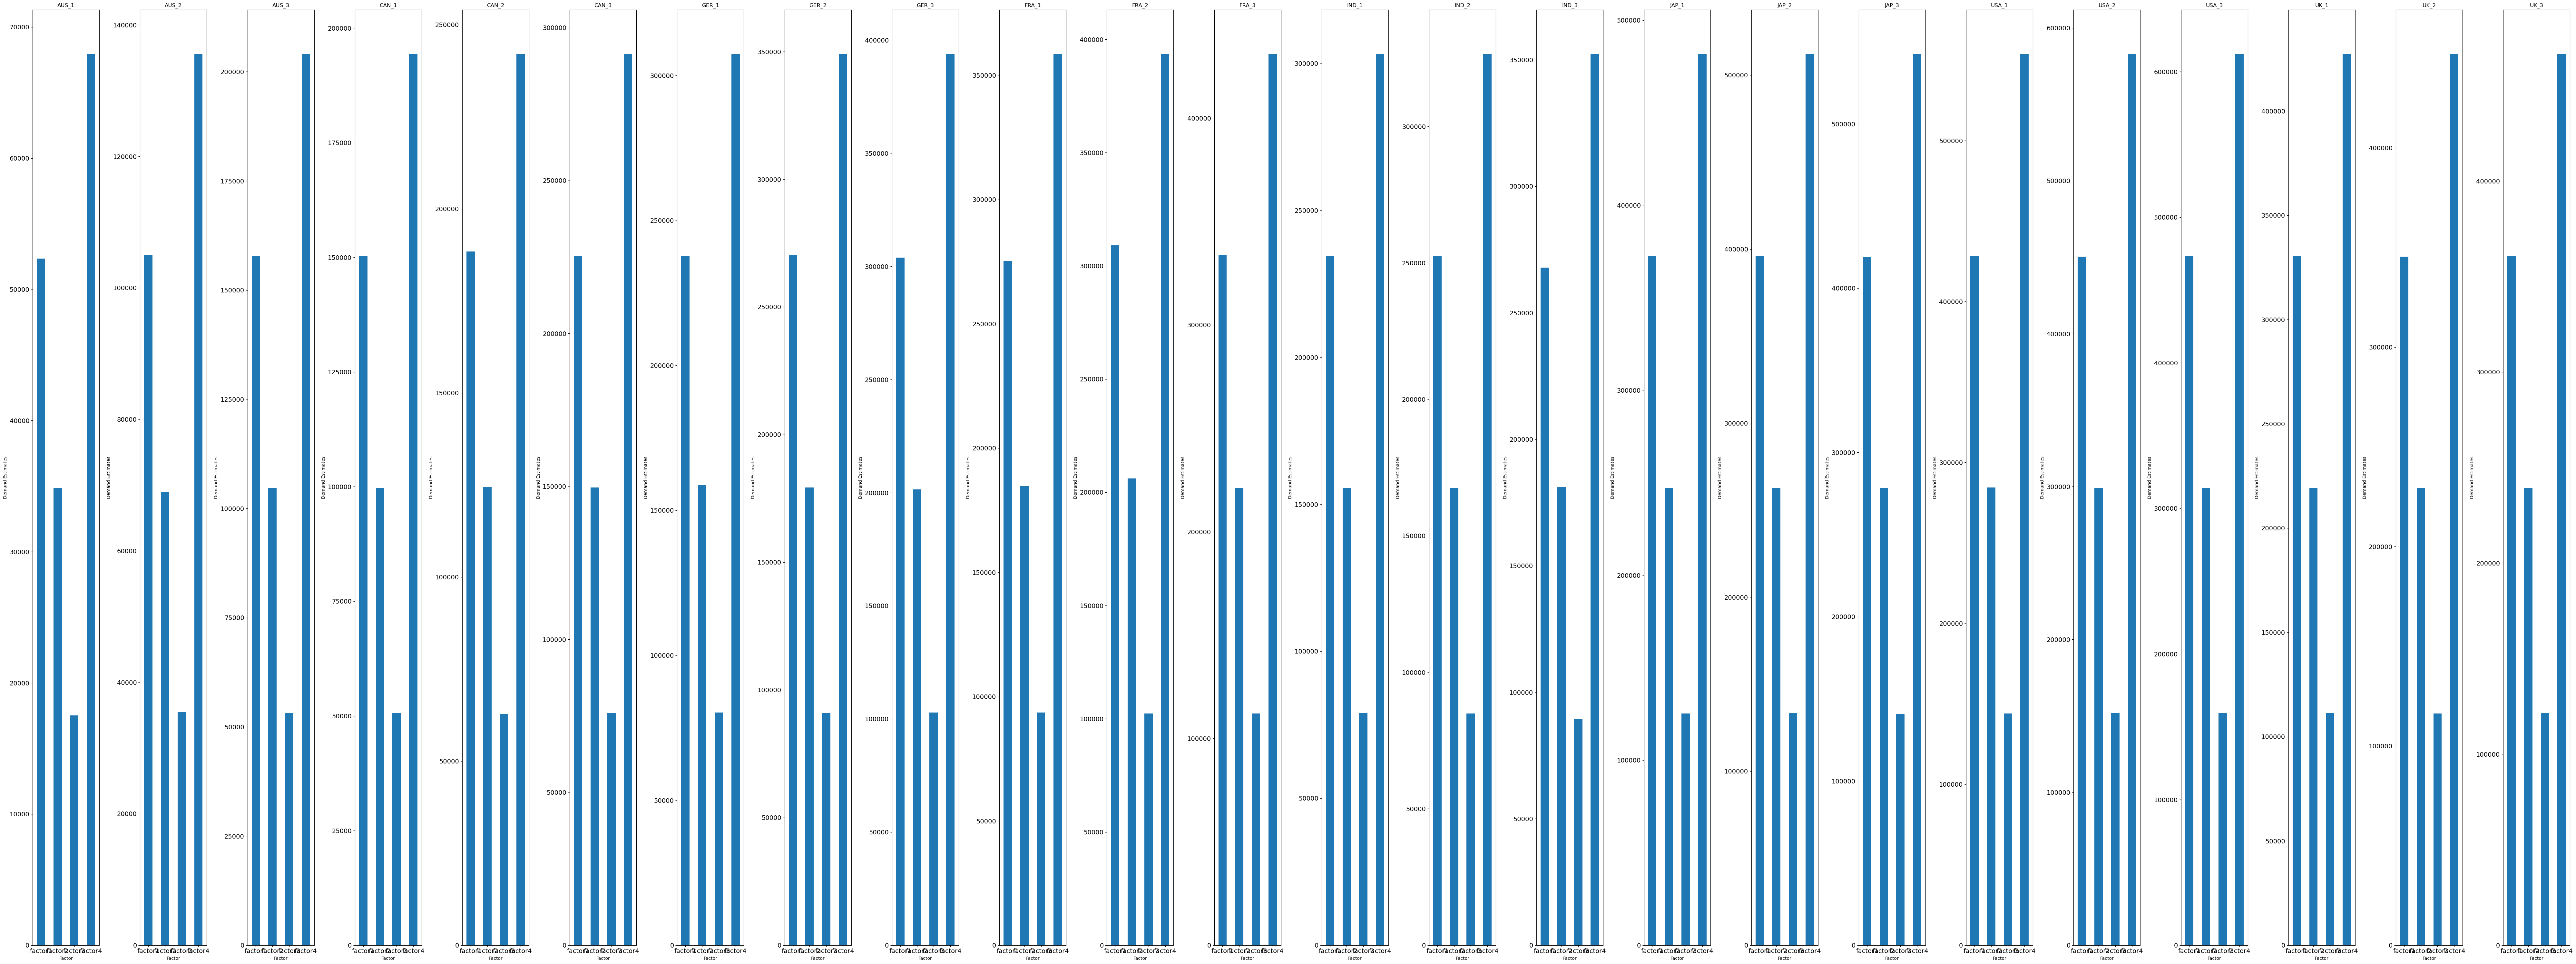

In [26]:
#plotting demand estimates for each country for each seasonality factors due to regulations
fig, axes = plt.subplots(nrows=1, ncols=24, figsize=(80, 30))

for i, j in enumerate(final_data_clean.iloc[:, 0:24].columns):
    final_data_clean.groupby('factor')[j].sum().plot(kind='bar', ax=axes[i])
    axes[i].tick_params(axis='both', labelsize=14) 
    axes[i].set_title(f"{final_data_clean.iloc[:, 0:24].columns[i]}")
    axes[i].set_xlabel('Factor')
    axes[i].set_ylabel('Demand Estimates')
    axes[i].set_xticklabels(final_data_clean.factor.unique(), rotation=0)

plt.tight_layout()
plt.show()

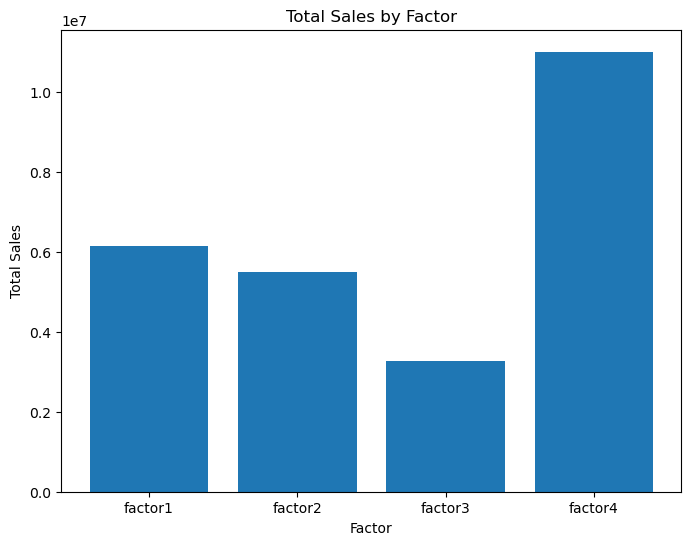

In [27]:
#plotting  total global sales for each seasonality factors due to regulations

sum_sales = final_data_clean.groupby('factor')['Sales'].sum()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(sum_sales.index, sum_sales.values)
ax.set_xlabel('Factor')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Factor')

plt.show()


From above we can see that, during factor1 and factor 4 seasoanility periods, there had been higher demand and global sales for doctor100 sprays

Lets decompose the time series data to analyze the trend and seasonal patterns separately, which can be useful for forecasting

In [28]:
#function to decompose time series 
def demand(df, sales_type='Sales', samples=1000, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[sales_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[sales_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

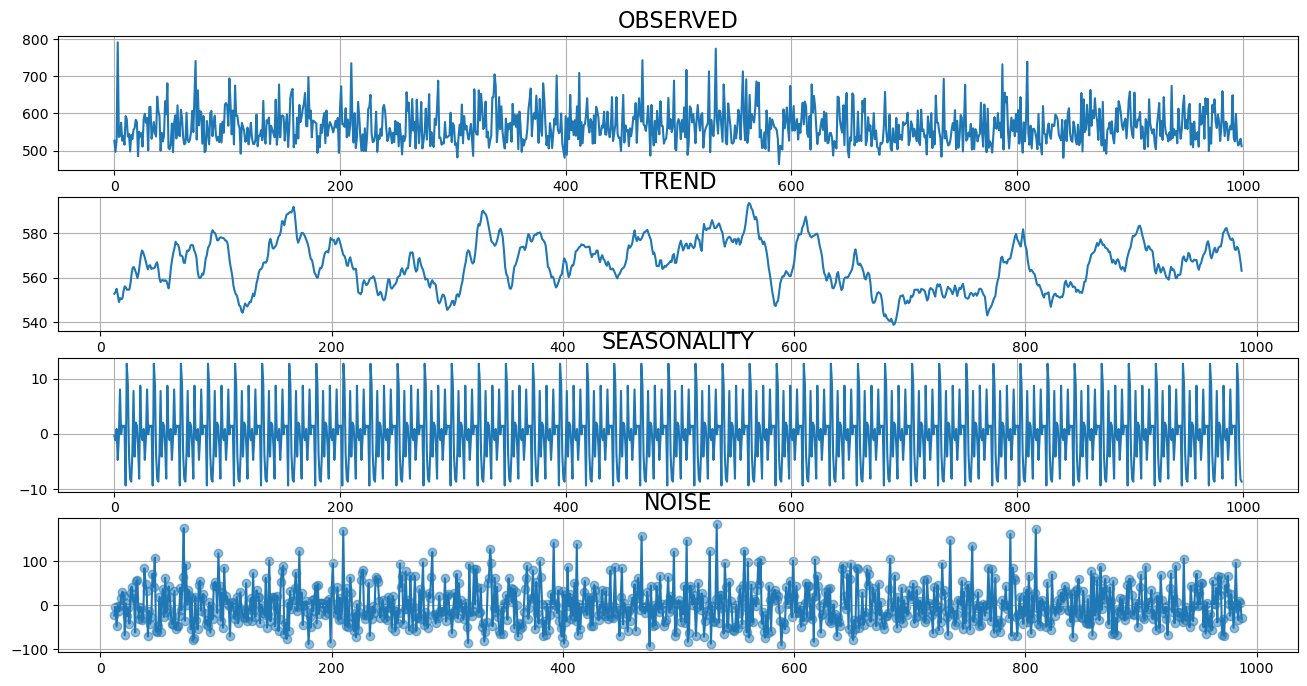

In [29]:
demand(final_data_clean,samples=1000, period=24)

We can see a clear seasonal pattern in the data. Despite this pattern, there is still a lot of noise that is not explained by our daily seasonality so we will try to model this noise using other variables in the dataset and some feature engineering by creating lag features

## Feature Engineering and Analysis

Lets create partial autocorrelation to see if there any significant lags we can create which has direct impact on sales/demand. But before that, lets check if 'Sales' column is stationary by using Dickey-Fuller test

In [30]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    



adfuller_test(final_data_clean['Sales'])

ADF Test Statistic : -2.5865980777302733
p-value : 0.09579892886339925
#Lags Used : 57
Number of Observations Used : 49422
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The result above shows that data is not stationary. Lets make it stationary by doing 24-hours shift on 'Sales' column and do the test again

In [31]:
final_data_clean['24_hours_difference'] = final_data_clean['Sales'] - final_data_clean['Sales'].shift(24)

In [32]:
adfuller_test (final_data_clean['24_hours_difference'].dropna())

ADF Test Statistic : -51.26750265805938
p-value : 0.0
#Lags Used : 48
Number of Observations Used : 49407
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


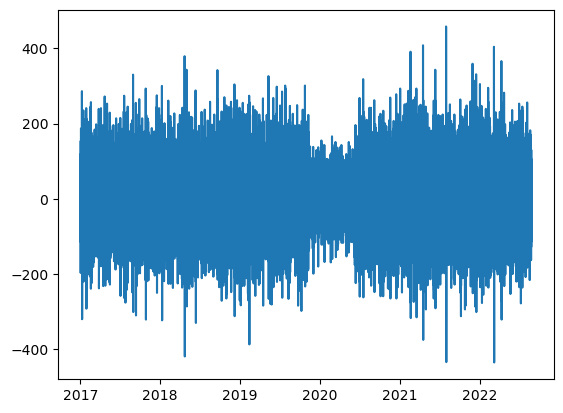

In [33]:
plt.plot(final_data_clean['24_hours_difference'].iloc[24:])

The results and plot above shows that data is stationary. Lets do partial auto correlation on stationary data to find important lags using 24 hours lags

/Users/ulvijafarli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 30000x2000 with 0 Axes>

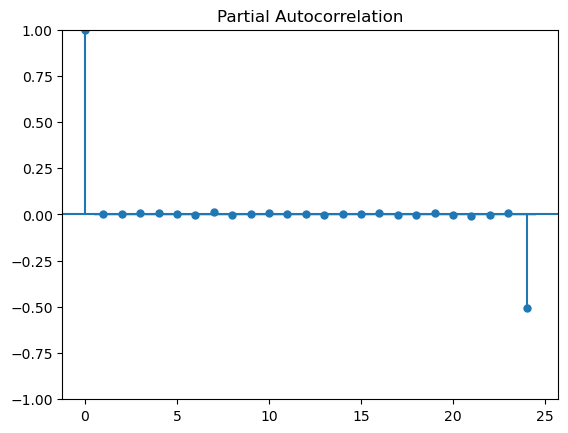

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(300,20))
plot_pacf(final_data_clean['24_hours_difference'].iloc[24:], lags=24,use_vlines=True)
plt.show()

We can see that 24th hours lag is significant and we can create 24 hours lag features in the final_data_clean dataset with great confidence using 'Sales' and 'Total_Scaled_demand' columns. As problem describes, there are also seasonal lags in the data set that divided by factor1, factor2, factor3 and factor4 seasonal factors. Those factor indexes will also be used to create seasonal lags between demand estimates 

In [35]:
#droppong this column as it will not be needed for further analysis
final_data_clean.drop('24_hours_difference', axis=1,inplace=True)

In [36]:
#Creating lag features in below function based on 24 hours lag and seasonal lag
def create_lag_features(data, feature_cols, lag_cols, shifts):
    for i, feature_col in enumerate(feature_cols):
        for j, shift in enumerate(shifts):
            lag_col = lag_cols[i][j]
            data[lag_col] = data[feature_col].shift(-shift)
    return data


feature_cols = ['Sales']
lag_cols = [['24_hours_sales_lag', 'factor2_seasonal_lag', 'factor3_seasonal_lag', 'factor4_seasonal_lag']]
shifts = [24, 15021, 24996, 30053]

final_data_clean = create_lag_features(final_data_clean, feature_cols, lag_cols, shifts)

In [37]:
final_data_clean.head()

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,...,France,India,Japan,USA,UK,Total_Scaled_demand,24_hours_sales_lag,factor2_seasonal_lag,factor3_seasonal_lag,factor4_seasonal_lag
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,3.5,10.5,10.5,10.0,10.0,10.0,0.00,15.75,24.75,11.10,...,70.30,33.6,82.15,91.5,68,440.55,378.0,522.0,621.0,550.0
2017-01-01 01:00:00,3.5,3.5,10.5,10.0,15.0,17.5,9.00,13.50,27.00,18.50,...,59.20,39.6,75.95,88.5,71,443.75,413.0,540.0,680.0,585.0
2017-01-01 02:00:00,3.5,0.0,10.5,10.0,12.5,12.5,22.50,15.75,22.50,38.85,...,62.90,42.0,72.85,91.5,70,449.00,383.0,507.0,633.0,482.0
2017-01-01 03:00:00,3.5,3.5,10.5,10.0,12.5,15.0,6.75,18.00,24.75,18.50,...,46.25,37.2,79.05,88.5,67,422.50,408.0,500.0,692.0,566.0
2017-01-01 04:00:00,3.5,17.5,10.5,10.0,10.0,12.5,2.25,18.00,18.00,14.80,...,44.40,38.4,74.40,88.5,69,416.95,358.0,545.0,600.0,543.0


In [38]:
final_data_clean.fillna(0,inplace=True)

In [39]:
final_data_clean.isnull().sum()

AUS_1                   0
AUS_2                   0
AUS_3                   0
CAN_1                   0
CAN_2                   0
CAN_3                   0
GER_1                   0
GER_2                   0
GER_3                   0
FRA_1                   0
FRA_2                   0
FRA_3                   0
IND_1                   0
IND_2                   0
IND_3                   0
JAP_1                   0
JAP_2                   0
JAP_3                   0
USA_1                   0
USA_2                   0
USA_3                   0
UK_1                    0
UK_2                    0
UK_3                    0
factor                  0
Sales                   0
Australia               0
Canada                  0
Germany                 0
France                  0
India                   0
Japan                   0
USA                     0
UK                      0
Total_Scaled_demand     0
24_hours_sales_lag      0
factor2_seasonal_lag    0
factor3_seasonal_lag    0
factor4_seas

There is also possibility of creating date features in the dataset to capture more seasonlity and trend in the data. The below code will add hour, day and month columns to the dataset. 

In [40]:
def add_time_features(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    return df

final_data_clean = add_time_features(final_data_clean)

Lets also create dummy variable for the factor column to use it in the modelling

In [41]:
dummy_factors = pd.get_dummies(final_data_clean['factor'])
final_data_clean = pd.concat([final_data_clean, dummy_factors], axis=1)
final_data_clean = final_data_clean.drop('factor', axis=1)


In [42]:
final_data_clean.head()

,AUS_1,AUS_2,AUS_3,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,...,factor2_seasonal_lag,factor3_seasonal_lag,factor4_seasonal_lag,hour,day,month,factor1,factor2,factor3,factor4
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,3.5,10.5,10.5,10.0,10.0,10.0,0.00,15.75,24.75,11.10,...,522.0,621.0,550.0,0,1,1,1,0,0,0
2017-01-01 01:00:00,3.5,3.5,10.5,10.0,15.0,17.5,9.00,13.50,27.00,18.50,...,540.0,680.0,585.0,1,1,1,1,0,0,0
2017-01-01 02:00:00,3.5,0.0,10.5,10.0,12.5,12.5,22.50,15.75,22.50,38.85,...,507.0,633.0,482.0,2,1,1,1,0,0,0
2017-01-01 03:00:00,3.5,3.5,10.5,10.0,12.5,15.0,6.75,18.00,24.75,18.50,...,500.0,692.0,566.0,3,1,1,1,0,0,0
2017-01-01 04:00:00,3.5,17.5,10.5,10.0,10.0,12.5,2.25,18.00,18.00,14.80,...,545.0,600.0,543.0,4,1,1,1,0,0,0


## Correlation Check

<Axes: >

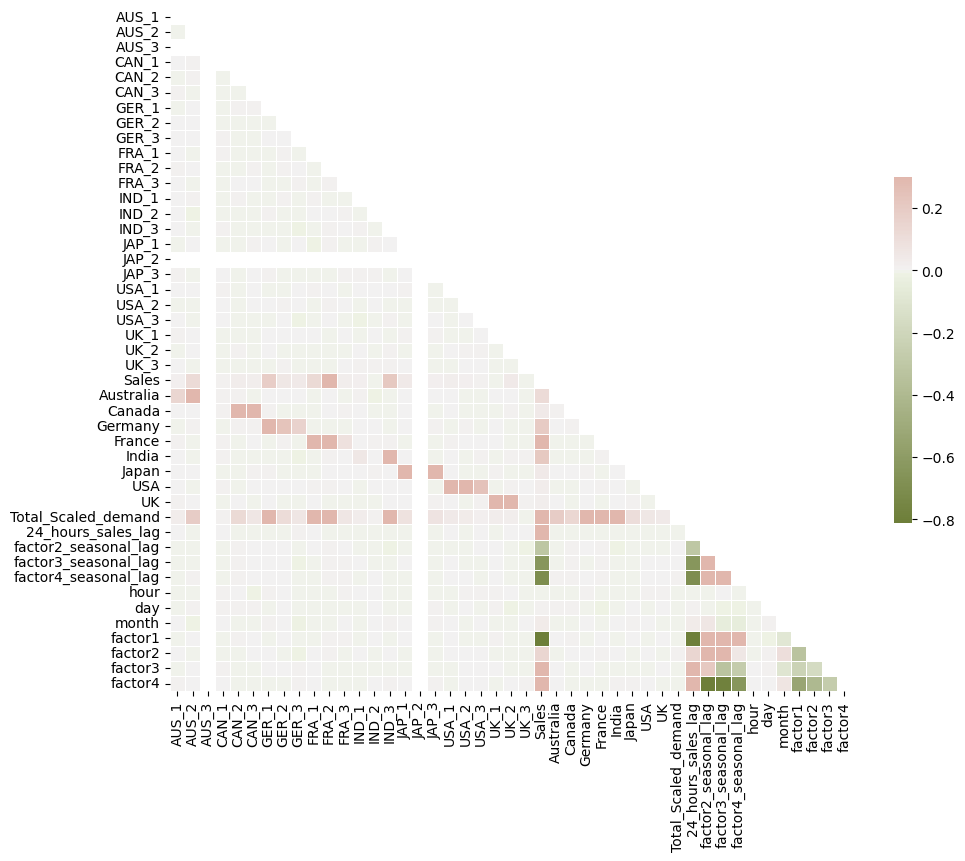

In [43]:
corr = final_data_clean.corr()
#mask for upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(100,20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
final_data_clean[['AUS_3','JAP_2']].describe()

,AUS_3,JAP_2
count,49480.0,4.948000e+04
mean,10.5,2.635000e+01
std,0.0,5.009377e-12
min,10.5,2.635000e+01
25%,10.5,2.635000e+01
50%,10.5,2.635000e+01
75%,10.5,2.635000e+01
max,10.5,2.635000e+01


Since both of the features above has zero variance due to contanst deman values, we can exclude tham from the analysis analysis as they will not any contribution to the model

In [45]:
final_data_clean.drop(columns=['AUS_3','JAP_2'], inplace=True)

In [46]:
final_data_clean

,AUS_1,AUS_2,CAN_1,CAN_2,CAN_3,GER_1,GER_2,GER_3,FRA_1,FRA_2,...,factor2_seasonal_lag,factor3_seasonal_lag,factor4_seasonal_lag,hour,day,month,factor1,factor2,factor3,factor4
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,3.5,10.5,10.0,10.0,10.0,0.00,15.75,24.75,11.10,33.30,...,522.0,621.0,550.0,0,1,1,1,0,0,0
2017-01-01 01:00:00,3.5,3.5,10.0,15.0,17.5,9.00,13.50,27.00,18.50,14.80,...,540.0,680.0,585.0,1,1,1,1,0,0,0
2017-01-01 02:00:00,3.5,0.0,10.0,12.5,12.5,22.50,15.75,22.50,38.85,1.85,...,507.0,633.0,482.0,2,1,1,1,0,0,0
2017-01-01 03:00:00,3.5,3.5,10.0,12.5,15.0,6.75,18.00,24.75,18.50,7.40,...,500.0,692.0,566.0,3,1,1,1,0,0,0
2017-01-01 04:00:00,3.5,17.5,10.0,10.0,12.5,2.25,18.00,18.00,14.80,7.40,...,545.0,600.0,543.0,4,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24 11:00:00,3.5,10.5,10.0,17.5,15.0,2.25,20.25,22.50,5.55,1.85,...,0.0,0.0,0.0,11,24,8,0,0,0,1
2022-08-24 12:00:00,3.5,7.0,10.0,10.0,15.0,9.00,15.75,15.75,14.80,12.95,...,0.0,0.0,0.0,12,24,8,0,0,0,1
2022-08-24 13:00:00,3.5,0.0,10.0,15.0,12.5,0.00,11.25,18.00,35.15,16.65,...,0.0,0.0,0.0,13,24,8,0,0,0,1


The code below will check correlation among the featues and will print top 20 features. 

In [47]:
def get_redundant_pairs(df):
    #Get diagonal and lower triangular pairs of correlation matrix

    pairs_to_drop = set()
    cols = df.columns
    
    for i in range(0,df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df,n=5):
    #Sort correlations in the descending order and return n highest results

    aur_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    aur_corr = aur_corr.drop(labels = labels_to_drop).sort_values(ascending=False)
    return aur_corr[0:n]

#print top 20 correlated features
print('Top Absolute Correlations')
print(get_top_abs_correlations(final_data_clean,20))

Top Absolute Correlations
IND_3                 India                   0.999011
AUS_2                 Australia               0.989438
GER_1                 Germany                 0.957807
CAN_2                 Canada                  0.903120
factor4_seasonal_lag  factor1                 0.816243
factor2_seasonal_lag  factor4                 0.812944
UK_1                  UK                      0.811775
factor3_seasonal_lag  factor4_seasonal_lag    0.811724
Sales                 factor1                 0.810166
24_hours_sales_lag    factor1                 0.801525
factor3_seasonal_lag  factor4                 0.788255
JAP_1                 Japan                   0.745501
FRA_2                 France                  0.739172
Sales                 24_hours_sales_lag      0.725110
France                Total_Scaled_demand     0.720736
Sales                 factor4_seasonal_lag    0.705166
USA_1                 USA                     0.702031
24_hours_sales_lag    factor4_seasonal_

As you can see above, new country name features and Total_Scaled_demand are highly correlated to their production centers demands and will not be be used in model creation to avoid multicollienarity and overfitting. The seasonal lag features that highly correlated to the seasonily factors will be kept in the model due to fact that adding lag features helps model to forecast better for future periods

## Model Training, Selection and Evaluation

The sections below shows how final regressor model is selected/evaluated to forecast the future sales. The metrics used for evaluation of each model is r2_score, MAE and MSE

In [48]:
#using TimeSeriesSplit to create training/test set 
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

In [49]:
#splitting data into train/test set 
X = final_data_clean.drop(['Sales','Total_Scaled_demand','Australia', 'Canada', 'Germany', 'France', 'India','Japan', 'USA', 'UK',],axis=1)
y = final_data_clean['Sales']
scores = []
#cross-validation using TimeSeriesSplit
for train_index, test_index in tss.split(X):
       X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
       y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [50]:
#creating pipeline function to scale independent vars for each model
def get_pipeline(X, model):

    bundled_pipeline = Pipeline(steps = [('scaler', StandardScaler()),('model', model)])
    return bundled_pipeline

In [51]:
#creating function to evaluate each model based on r2_score, mse and mae
import time

def select_model(X, y, pipeline = None):

  regressors = {}
  regressors.update({'XGBRegressor': XGBRegressor(objective = 'reg:squarederror', random_state = 42)})
  regressors.update({'LGBMRegressor': LGBMRegressor(random_state = 42)})
  regressors.update({'DecisionTreeRegressor': DecisionTreeRegressor(random_state = 42)})
  regressors.update({'BaggingRegressor': BaggingRegressor(random_state = 42)})
  regressors.update({'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 42)})
  regressors.update({'AdaBoostRegressor': AdaBoostRegressor(random_state = 42)})
  regressors.update({'RandomForestRegressor': RandomForestRegressor(random_state = 42)})
  regressors.update({'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state = 42)})
  regressors.update({'MLPRegressor': MLPRegressor(random_state = 42)})
  

  df_models = pd.DataFrame(columns = ['model', 'run_time', 'r2_score', 'mse', 'mae'])

  for key in regressors:

      print('*', key)

      start_time = time.time()
      
      pipeline = get_pipeline(X_train, regressors[key])
      pipeline.fit(X_train, y_train)
      y_pred = pipeline.predict(X_test)

      row = {'model': key,
             'run_time': format(round((time.time() - start_time) / 60, 2)),
             'r2_score': np.round(r2_score(y_test, y_pred),5),
             'mse' :     np.round(mean_squared_error(y_test, y_pred),5),
             'mae' : np.round(mean_absolute_error(y_test, y_pred),5)}


      df_models = df_models.append(row, ignore_index = True)

  df_models = df_models.sort_values(by = 'r2_score', ascending = False)
  
  return df_models

In [52]:
#caliing select model function
models = select_model(X_train, y_train)


* XGBRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* LGBMRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* DecisionTreeRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* BaggingRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* GradientBoostingRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* AdaBoostRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* RandomForestRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* HistGradientBoostingRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


* MLPRegressor


/var/folders/r2/tn8prctn6vs075d1p3j7lz7h0000gn/T/ipykernel_2505/833223456.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index = True)


In [53]:
models

,model,run_time,r2_score,mse,mae
8,MLPRegressor,0.34,0.99973,0.69489,0.31752
0,XGBRegressor,0.03,0.97326,67.69978,5.91155
7,HistGradientBoostingRegressor,0.02,0.96748,82.34062,6.09764
1,LGBMRegressor,0.01,0.96625,85.46053,6.19473
6,RandomForestRegressor,0.48,0.94429,141.04845,8.57024
3,BaggingRegressor,0.05,0.93278,170.20371,9.51596
4,GradientBoostingRegressor,0.1,0.90492,240.73563,11.35257
2,DecisionTreeRegressor,0.01,0.85487,367.43921,14.47866
5,AdaBoostRegressor,0.05,0.53040,1188.96113,28.16971


Based on r2_score and mean squared error metrics, we can conclude that MLPRegressor is more suitable to forecast future demand for the company. The new forecasting will be plotted against actual demand to show how close values had been forecasted

In [54]:
mlp = MLPRegressor(random_state = 42)
#scaling independent training variables
bundled_pipeline_mlp = get_pipeline(X_train, mlp)
bundled_pipeline_mlp.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', MLPRegressor(random_state=42))])

In [55]:
import pickle
pickle.dump(bundled_pipeline_mlp,open('scaling.pkl','wb'))

The cell below will extract feature coeffcients to learn about their importance in the model 

In [56]:
weights = mlp.coefs_[0]
feature_importance_weights = abs(weights.sum(axis=1))


In [57]:
sorted_indices = np.argsort(feature_importance_weights)
X_train.columns[sorted_indices]


Index(['day', 'IND_2', 'CAN_3', 'GER_3', 'factor2_seasonal_lag', 'AUS_1',
       'FRA_3', 'JAP_3', 'UK_1', 'hour', 'USA_2', 'CAN_2', 'IND_1', 'USA_3',
       'GER_2', 'CAN_1', 'UK_3', 'USA_1', 'month', 'UK_2', 'JAP_1', 'AUS_2',
       'factor3', 'FRA_2', 'factor3_seasonal_lag', 'GER_1', 'FRA_1',
       '24_hours_sales_lag', 'factor4_seasonal_lag', 'IND_3', 'factor4',
       'factor1', 'factor2'],
      dtype='object')

Text(0, 0.5, 'Features')

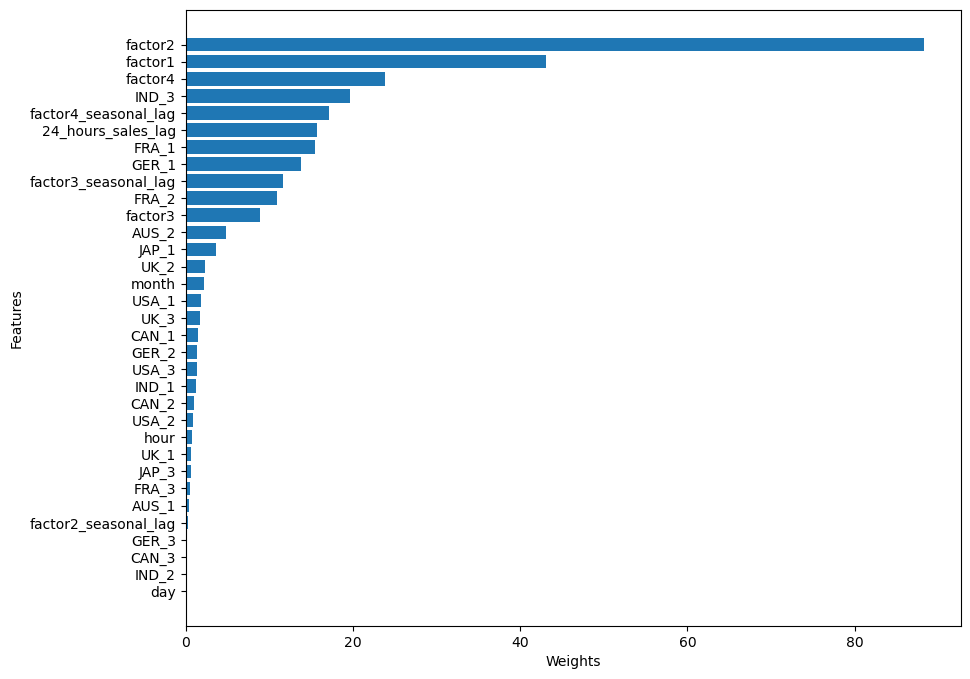

In [58]:
#plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(X_train.columns[sorted_indices],sorted(feature_importance_weights,reverse=False),height=0.8)
plt.xlabel('Weights')
plt.ylabel('Features')


From the graph above, we can conclude that, seasonal factor 2,1,4 features and IND_3 production center feature have more significant impact on sales of spray and AUS_1, GER_3, CAN_3 and IND_2 production centers and factor2_seasonal_lag feature have least impact on sales of spray 

Lets predict future demands using test data

In [59]:
y_pred_mlp = bundled_pipeline_mlp.predict(X_test)

mae_mlp = np.round(mean_absolute_error(y_test, y_pred_mlp), 3)    
mae_mlp

0.318

In [60]:
X_test.columns

Index(['AUS_1', 'AUS_2', 'CAN_1', 'CAN_2', 'CAN_3', 'GER_1', 'GER_2', 'GER_3',
       'FRA_1', 'FRA_2', 'FRA_3', 'IND_1', 'IND_2', 'IND_3', 'JAP_1', 'JAP_3',
       'USA_1', 'USA_2', 'USA_3', 'UK_1', 'UK_2', 'UK_3', '24_hours_sales_lag',
       'factor2_seasonal_lag', 'factor3_seasonal_lag', 'factor4_seasonal_lag',
       'hour', 'day', 'month', 'factor1', 'factor2', 'factor3', 'factor4'],
      dtype='object')

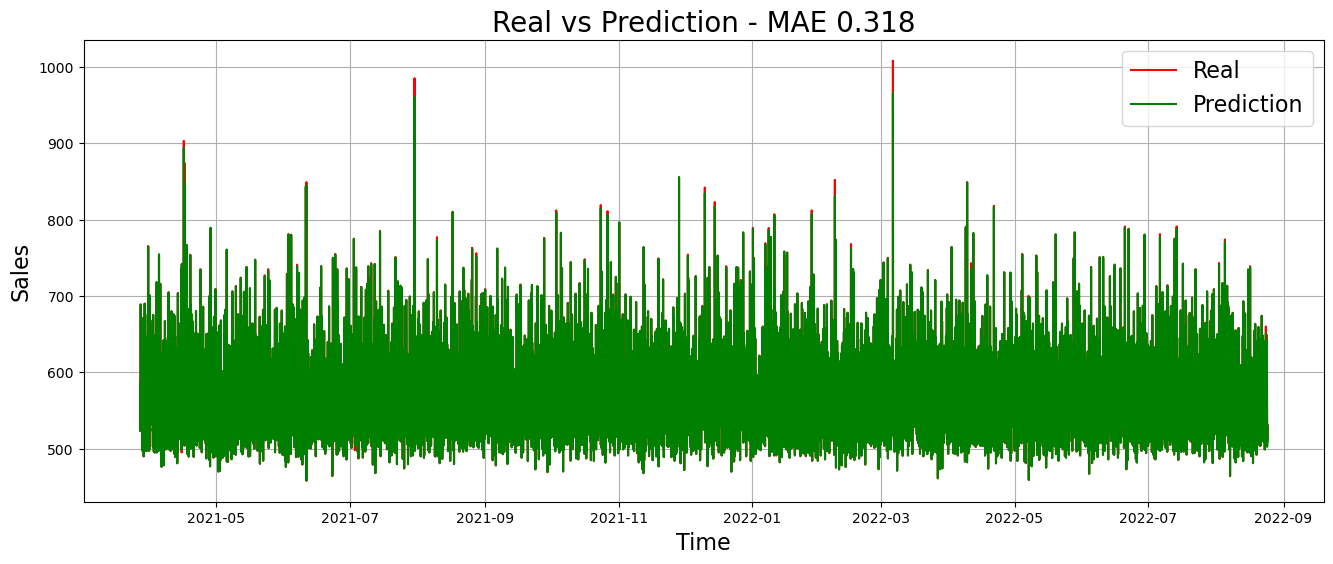

In [61]:
fig = plt.figure(figsize=(16,6))
plt.title(f'Real vs Prediction - MAE {mae_mlp}', fontsize=20)
plt.plot(y_test, color='red')
plt.plot(pd.Series(y_pred_mlp, index=y_test.index), color='green')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

From the chart above, it can be concluded that MLP neural network model  did a great job in terms of capturing seasonlity and temporal dependencies within the data. The model can further be improved by doing hyper parameter tuning. 



Additioanlly, LTSM RNN model could also be explored to remember important past information and use it to make better forecasting in the future. Lets see if LSTM model is betten than MLP model in terms of performance

## Deep Learning - LSTM

The section below will use Long-Short Term Memory deep learning model to predict future sales of spray. 

In [62]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM, Dense
from keras.models import Sequential


#scaling data before inputting into neural network
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train_sc = scaler_x.fit_transform(X_train)
y_train_sc = scaler_y.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = scaler_x.transform(X_test)

X_train_sc_re = X_train_sc.reshape(37110,1,33)
X_test_sc_re = X_test_sc.reshape(12370,1,33)

X_train_sc_re = X_train_sc.reshape(37110,1,33)
X_test_sc_re = X_test_sc.reshape(12370,1,33)



2023-06-26 00:01:32.318403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
# creating a LSTM model 
def lstm_model(neurons, num_of_features, output_size):

    n_steps = 1

    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True, input_shape=(n_steps, num_of_features)))
    model.add(LSTM(units=neurons))
    model.add(Dense(units=output_size))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model 

In [64]:
#creating scaling function to normalize input data before going into neural network
def scaler (X_train, y_train, X_test, scaler): 
    
    #scaling data before inputting into neural network
    scaler_x = scaler
    scaler_y = scaler
    X_train_sc = scaler_x.fit_transform(X_train)
    X_test_sc = scaler_x.transform(X_test)
    y_train_sc = scaler_y.fit_transform(y_train.values.reshape(-1,1))

    
    #reshaping scaled data by converting it into 3D model 
    X_train_sc_re = X_train_sc.reshape(37110,1,33)
    X_test_sc_re = X_test_sc.reshape(12370,1,33)


    
    return X_train_sc_re, X_test_sc_re, y_train_sc

In [65]:
#calling scaler function
X_train_sc_re, X_test_sc_re, y_train_sc = scaler(X_train, y_train, X_test, StandardScaler())

In [66]:
#training a model  by calling pre-defined model function
model_lstm = lstm_model(50,33,1)
history = model_lstm.fit(X_train_sc_re, y_train_sc, epochs=300, batch_size=64)

2023-06-26 00:01:42.157732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
580/580 [==============================] - 3s 2ms/step - loss: 0.0825
Epoch 2/300
580/580 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 3/300
580/580 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 4/300
580/580 [==============================] - 1s 2ms/step - loss: 6.1446e-04
Epoch 5/300
580/580 [==============================] - 1s 2ms/step - loss: 5.4998e-04
Epoch 6/300
580/580 [==============================] - 1s 2ms/step - loss: 4.0494e-04
Epoch 7/300
580/580 [==============================] - 1s 2ms/step - loss: 3.0759e-04
Epoch 8/300
580/580 [==============================] - 1s 2ms/step - loss: 3.6932e-04
Epoch 9/300
580/580 [==============================] - 1s 2ms/step - loss: 2.5905e-04
Epoch 10/300
580/580 [==============================] - 1s 2ms/step - loss: 2.6741e-04
Epoch 11/300
580/580 [==============================] - 1s 2ms/step - loss: 2.2607e-04
Epoch 12/300
580/580 [==============================] - 1s 2ms/s

In [67]:
#predicting the futurue sales using model and inversing to get unscaled version of future demands
y_pred_scaled_lstm = model_lstm .predict(X_test_sc_re)
y_pred_lstm =scaler_y.inverse_transform(y_pred_scaled_lstm)
#converting into one dim output
y_pred_lstm=y_pred_lstm.flatten()

387/387 [==============================] - 1s 685us/step


In [68]:

r_2 = np.round(r2_score(y_test, y_pred_lstm),5)
mae_lstm = np.round(mean_absolute_error(y_test, y_pred_lstm),5)
mae_lstm

0.4878

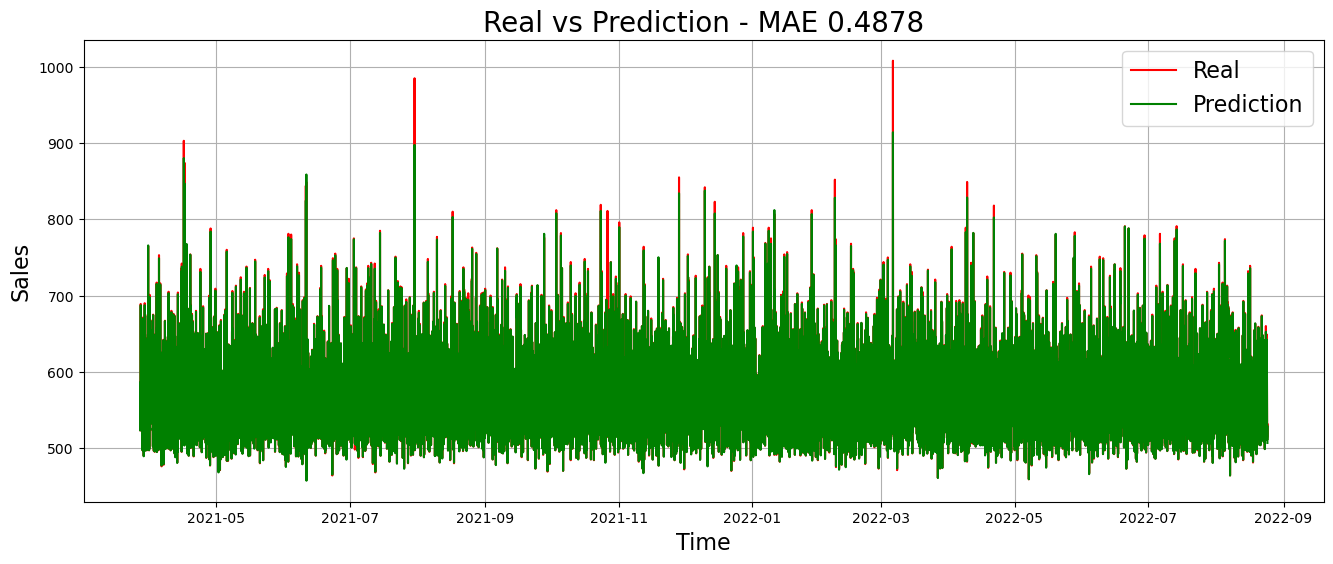

In [69]:
fig = plt.figure(figsize=(16,6))
plt.title(f'Real vs Prediction - MAE {mae_lstm}', fontsize=20)
plt.plot(y_test, color='red')
plt.plot(pd.Series(y_pred_lstm, index=y_test.index), color='green')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

Based on evaluation metrics of LSTM model, we can conculede that MLP model is still better choice for forcating future sales of sprays

Lets deploy MLP model using docker 

In [70]:
pickle.dump(bundled_pipeline_mlp,open('mlp.pkl','wb'))
pickle_model = pickle.load(open('mlp.pkl','rb'))

In [71]:
pickle_model.predict(X_test.iloc[0].values.reshape(1,-1))

/Users/ulvijafarli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([547.06033293])